# Example 0: Importing and Plotting Waveforms

One of the most powerful features of this tool is the ability to plot and automatically determine key metrics relevant to lighting flicker. This brief tutorial will show off some of the features with code examples.

You'll see just how easy and quick it can be to get beautiful, accurate flicker data!

In [1]:
# First, some boilerplate code just to run this notebook

# displays plots in this notebook
%matplotlib inline 

# Since we are in the ./examples folder, add the root folder (../) to the path
import sys
sys.path.append('../')

## Step 1: Importing a Waveform

Flicker waveforms are often generated by a simple photodiode circuit connected to an oscilloscope. You can get an idea of which photodiodes are worth your time, and the respective circuits to make them work, at [this link](http://budgetlightforum.com/node/61254). 

Most modern oscilloscopes can output a .csv file with two columns per channel: one for time (usually in seconds) and the other for voltage (usually in volts).

This library is much faster than Excel and similar tools for large datasets, but you should check the resolution of the csv output of your scope. If it is hundreds of megabytes, as is the case for the default USB output of my 200 MHz scope, you are exporting way more data points than you need to test lighting flicker. In the case of my scope, I had to use the associated PC tool to output a smaller file with about 1000x less resolution (still overkill for measuring flicker).

Also, it's OK if the data from your scope is a little noisy, as long as you can clearly make out the waveform. This library automatically denoises your waveform for you, as long as it's not too noisy. Gut-check the resulting waveforms to see if the results match your intuition.

Once you have your CSV file, make sure the 1st column really is in seconds (doesn't matter if values are negative) and the 2nd column is in volts (and not mV or other multiple). Strip all header information so that you just have the numbers. A good place to save it is the CSVs folder.

**Now we can import the waveform using the Waveform class:**

In [2]:
# Import the Waveform class
from src.waveform import Waveform

# Import the waveform
# The parameters to Waveform are (filename, Name)
wave_0 = Waveform('../CSVs/Example_Waveform.csv', 'Wave 0')

/usr/local/lib/python3.7/site-packages/scipy/signal/_savitzky_golay.py:135: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  coeffs, _, _, _ = lstsq(A, y)
/usr/local/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


## Step 2: Basic Plotting

**It's super easy to generate a plot showing our waveform:**

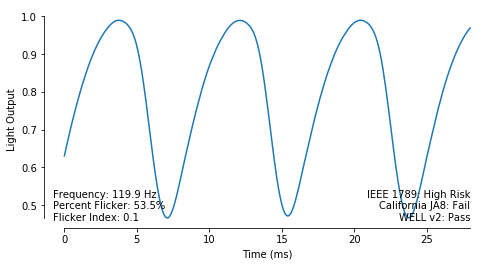

In [3]:
# Plot the waveform
wave_0.plot()

**Wow!!** That was easy!

## Feature Spotlight: Automatic Noise Reduction

This is the perfect opportunity to highlight the automatic noise reduction performed by this library. The data in the file Example_Waveform.csv is relatively noisy. 

**We are going to import the same file, this time with the automatic noise filter turned off:**

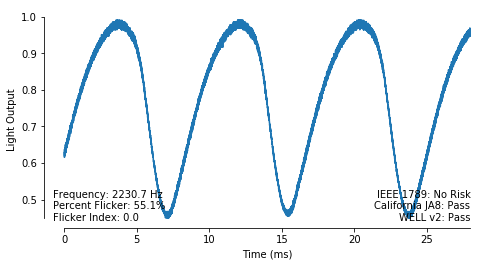

In [4]:
# Import the waveform again, this time with the noise filter disabled
# We are passing the additional (optional) parameter remove_noise. It is set to True by default
wave_0_denoise = Waveform('../CSVs/Example_Waveform.csv', 'Wave 0', remove_noise=False)

# Plot the original (noisy) waveform
wave_0_denoise.plot()

**Yikes!** The automatic noise filter really does make a difference! 

Notice that the values displayed in the lower left corner of the plot are no longer accurate with the noise filter turned off. **Disable the filter at your own risk!**

## Step 3: Scaled Plots

Take a look at the Y axis of the plots we've generated so far. You see the the top limit is 1.0, but the bottom limit is not 0.0. 

It can be helpful to view flicker data on a normalized 0 to 1 scale. **Here's how easy it is to do that using the fullheight parameter:**

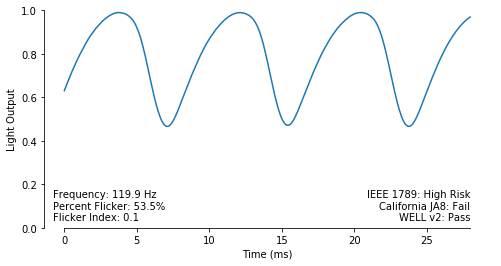

In [5]:
wave_0.plot(fullheight=True)

**See the difference?** Now the Y scale goes from 0 to 1.

## Step 4: Displaying n Periods

Maybe you want to get a closer look at one or a few periods. As long as that number is less than the number of periods in the input data (our previous examples show a little more than 3 periods), it's no problem.

**Here's one period:**

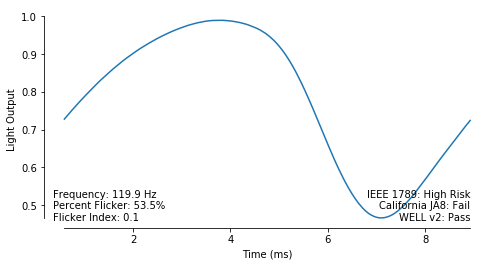

In [6]:
wave_0.plot(num_periods=1)

**Easy, right?** Here's two periods, with the fullheight parameter also applied:

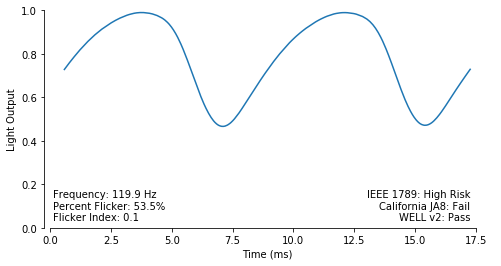

In [7]:
wave_0.plot(num_periods=2, fullheight=True)

## Step 5: Saving to a File

It's easy to save the plot to a file. Just add the parameter *filename,* specifying the name and location of the file: 

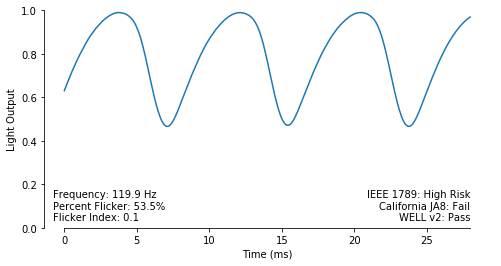

In [8]:
wave_0.plot(fullheight=True, filename='../out/example_0.png')

## Next Steps

That's it for this tutorial! Check out the other examples for guidance on working with data and plotting IEEE 1789 graphics.